<a href="https://colab.research.google.com/github/yonseimath/data-science-2022-biginner/blob/feature%2Fyenakim/yenakim/dacon_hospital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 데이터 준비


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

train_df = pd.read_csv('train.csv')
predict_df = pd.read_csv('test.csv')

In [ ]:
train_df.head(5)

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


In [ ]:
predict_df.head(5)

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,2,NaN,incheon,139,19981125.0,300.0,general_hospital,6.682486e+10,0.000000e+00,6.565709e+10,...,5.540643e+10,5.068443e+10,3.714334e+10,4.720000e+09,4.690000e+09,1.608540e+10,8.944587e+09,693,693,same
1,5,NaN,jeju,149,20160309.0,44.0,hospital,3.495758e+10,0.000000e+00,3.259270e+10,...,6.730838e+10,4.209828e+10,2.420000e+10,2.521009e+10,1.830000e+10,3.789135e+09,0.000000e+00,379,371,same
2,6,NaN,jeonnam,103,19890427.0,276.0,general_hospital,2.326031e+10,2.542571e+09,2.308749e+10,...,0.000000e+00,2.777589e+10,2.182278e+10,0.000000e+00,0.000000e+00,0.000000e+00,1.638540e+10,NaN,NaN,NaN
3,8,NaN,busan,71,20100226.0,363.0,general_hospital,0.000000e+00,0.000000e+00,0.000000e+00,...,1.211517e+10,9.556237e+09,4.251867e+09,2.558931e+09,0.000000e+00,3.914284e+10,0.000000e+00,760,760,same
4,10,NaN,jeonbuk,26,20040604.0,213.0,general_hospital,5.037025e+10,0.000000e+00,4.855803e+10,...,4.395973e+10,7.535567e+09,3.298427e+09,3.642417e+10,2.134712e+10,2.574488e+10,1.507269e+10,437,385,same


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             301 non-null    int64  
 1   OC                  301 non-null    object 
 2   sido                301 non-null    object 
 3   sgg                 301 non-null    int64  
 4   openDate            301 non-null    int64  
 5   bedCount            296 non-null    float64
 6   instkind            300 non-null    object 
 7   revenue1            293 non-null    float64
 8   salescost1          293 non-null    float64
 9   sga1                293 non-null    float64
 10  salary1             293 non-null    float64
 11  noi1                293 non-null    float64
 12  noe1                293 non-null    float64
 13  interest1           293 non-null    float64
 14  ctax1               293 non-null    float64
 15  profit1             293 non-null    float64
 16  liquidAs

In [ ]:
predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             127 non-null    int64  
 1   OC                  0 non-null      float64
 2   sido                127 non-null    object 
 3   sgg                 127 non-null    int64  
 4   openDate            126 non-null    float64
 5   bedCount            119 non-null    float64
 6   instkind            125 non-null    object 
 7   revenue1            125 non-null    float64
 8   salescost1          125 non-null    float64
 9   sga1                125 non-null    float64
 10  salary1             125 non-null    float64
 11  noi1                125 non-null    float64
 12  noe1                125 non-null    float64
 13  interest1           125 non-null    float64
 14  ctax1               125 non-null    float64
 15  profit1             125 non-null    float64
 16  liquidAs

In [ ]:
train_df[train_df['OC']==' close']

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
35,58,close,gyeonggi,168,20130206,132.0,nursing_hospital,2.681766e+09,1.802009e+08,2.014580e+09,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,51.0,NaN,change
71,107,close,jeonbuk,26,19990805,NaN,traditional_hospital,4.131858e+09,1.436118e+08,3.529097e+09,...,2.658296e+09,2.632717e+09,2.442951e+09,2.557878e+07,0.000000e+00,2.487828e+09,0.0,85.0,74.0,same
93,140,close,gyeongbuk,114,20070420,203.0,hospital,5.423357e+09,0.000000e+00,5.212041e+09,...,2.733619e+09,1.406195e+08,0.000000e+00,2.590000e+09,2.590000e+09,3.752184e+09,0.0,NaN,NaN,NaN
111,164,close,jeonbuk,136,20050321,326.0,nursing_hospital,2.179021e+09,3.122066e+08,1.507567e+09,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,322.0,320.0,same
141,209,close,busan,63,19991112,151.0,hospital,8.845472e+09,0.000000e+00,7.958490e+09,...,1.495243e+10,1.001811e+10,6.250000e+09,4.934328e+09,4.922328e+09,2.500740e+08,0.0,110.0,110.0,same
158,238,close,jeonnam,19,20150316,119.0,hospital,3.581089e+09,5.106416e+08,2.848303e+09,...,5.376396e+09,2.031396e+09,2.986417e+08,3.350000e+09,3.350000e+09,4.221729e+09,0.0,64.0,77.0,change
177,265,close,jeonnam,53,20051111,652.0,nursing_hospital,1.683125e+10,2.372298e+09,1.234589e+10,...,1.430577e+10,1.682877e+09,2.521391e+06,1.262290e+10,7.366342e+09,1.606544e+10,0.0,342.0,278.0,change
193,281,close,gyeonggi,12,20121213,NaN,NaN,3.054388e+08,2.241614e+07,4.674753e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,15.0,15.0,change
212,306,close,jeonnam,33,19990603,66.0,nursing_hospital,2.233031e+10,8.484657e+08,1.849255e+10,...,1.563217e+10,1.288180e+10,0.000000e+00,2.750371e+09,0.000000e+00,1.384958e+10,0.0,NaN,NaN,NaN
214,309,close,seoul,36,20141226,0.0,clinic,9.125255e+08,5.824151e+07,1.012169e+09,...,1.035994e+09,3.075474e+08,0.000000e+00,7.284463e+08,7.284463e+08,1.679837e+09,0.0,16.0,15.0,change


In [ ]:
train_df.drop('inst_id', axis=1, inplace = True) # id는 제외하고 분석
predict_df.drop('inst_id', axis=1, inplace = True) # predict_df = predict_df.drop('id', axis=1)와 동일한 효과

In [ ]:
predict_df.drop('OC', axis=1, inplace = True)

## 2. 결측치 확인

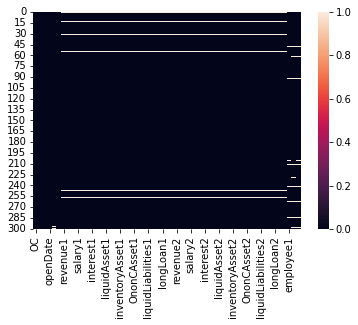

In [ ]:
%matplotlib inline
sns.heatmap(train_df.isnull())

In [ ]:
train_df[train_df.isna().any(axis=1)]

,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
1,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
14,open,ulsan,127,20160531,237.0,general_hospital,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,951.0,901.0,same
32,open,incheon,141,19930708,232.0,general_hospital,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323.0,323.0,same
35,close,gyeonggi,168,20130206,132.0,nursing_hospital,2.681766e+09,1.802009e+08,2.014580e+09,9.366451e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,51.0,NaN,change
48,open,seoul,1,19940425,28.0,traditional_hospital,8.872427e+09,9.641249e+08,7.638920e+09,4.488958e+09,...,5.958278e+09,5.956278e+09,4.992758e+09,2.000000e+06,0.000000e+00,3.625952e+09,0.000000e+00,NaN,NaN,NaN
55,open,gyeonggi,120,20130314,327.0,nursing_hospital,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,203.0,same
60,open,gangwon,128,20031201,244.0,nursing_hospital,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,open,busan,64,20170602,128.0,nursing_hospital,5.236406e+08,2.306773e+07,8.355775e+08,5.644636e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,38.0,NaN,NaN
71,close,jeonbuk,26,19990805,NaN,traditional_hospital,4.131858e+09,1.436118e+08,3.529097e+09,2.198043e+09,...,2.658296e+09,2.632717e+09,2.442951e+09,2.557878e+07,0.000000e+00,2.487828e+09,0.000000e+00,85.0,74.0,same
93,close,gyeongbuk,114,20070420,203.0,hospital,5.423357e+09,0.000000e+00,5.212041e+09,2.958250e+09,...,2.733619e+09,1.406195e+08,0.000000e+00,2.590000e+09,2.590000e+09,3.752184e+09,0.000000e+00,NaN,NaN,NaN


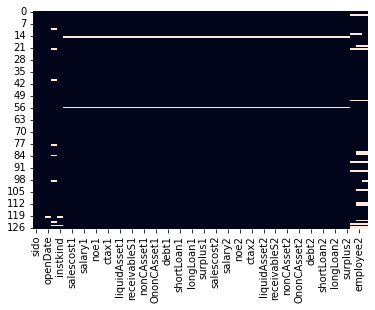

In [ ]:
%matplotlib inline
sns.heatmap(predict_df.isnull(), cbar=False)

In [ ]:
train_df.isna().sum()

OC                     0
sido                   0
sgg                    0
openDate               0
bedCount               5
instkind               1
revenue1               8
salescost1             8
sga1                   8
salary1                8
noi1                   8
noe1                   8
interest1              8
ctax1                  8
profit1                8
liquidAsset1           8
quickAsset1            8
receivableS1           8
inventoryAsset1        8
nonCAsset1             8
tanAsset1              8
OnonCAsset1            8
receivableL1           8
debt1                  8
liquidLiabilities1     8
shortLoan1             8
NCLiabilities1         8
longLoan1              8
netAsset1              8
surplus1               8
revenue2               8
salescost2             8
sga2                   8
salary2                8
noi2                   8
noe2                   8
interest2              8
ctax2                  8
profit2                8
liquidAsset2           8


In [ ]:
train_df.head(5)

,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,2.033835e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,2.964023e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,3.178605e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,2.446078e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


In [ ]:
numerical_df = train_df.select_dtypes(include = 'number')

In [ ]:
numerical_df.corr()

,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
sgg,1.000000,0.026059,0.021090,0.060943,0.041460,0.055987,0.049483,0.073464,0.095966,0.078631,...,0.101265,0.051012,0.059545,0.070174,0.046929,0.054543,0.017320,-0.024172,0.056274,0.055870
openDate,0.026059,1.000000,0.019251,-0.273546,-0.168242,-0.291757,-0.313554,-0.200698,-0.156695,-0.033805,...,0.012919,-0.229197,-0.209793,-0.173942,-0.186889,-0.029863,-0.180319,-0.142105,-0.283446,-0.310881
bedCount,0.021090,0.019251,1.000000,0.289082,0.078792,0.349943,0.404217,0.201880,0.193827,0.263906,...,0.018199,0.275485,0.272860,0.171153,0.233065,0.215910,0.229840,0.002476,0.549031,0.519291
revenue1,0.060943,-0.273546,0.289082,1.000000,0.763828,0.948704,0.887745,0.488480,0.547292,0.395143,...,-0.030880,0.790688,0.671424,0.335311,0.707237,0.335618,0.673484,0.379391,0.848154,0.840224
salescost1,0.041460,-0.168242,0.078792,0.763828,1.000000,0.529645,0.442412,0.293315,0.313329,0.066624,...,-0.013725,0.422473,0.362502,0.076776,0.377095,0.059127,0.468871,0.150657,0.535739,0.532871
sga1,0.055987,-0.291757,0.349943,0.948704,0.529645,1.000000,0.965193,0.493348,0.537183,0.488017,...,-0.027650,0.833485,0.712273,0.409504,0.740522,0.404109,0.660272,0.415082,0.864533,0.862690
salary1,0.049483,-0.313554,0.404217,0.887745,0.442412,0.965193,1.000000,0.507201,0.539640,0.469107,...,-0.024818,0.808134,0.670240,0.409030,0.741377,0.387288,0.668894,0.373222,0.884563,0.876730
noi1,0.073464,-0.200698,0.201880,0.488480,0.293315,0.493348,0.507201,1.000000,0.840733,0.152248,...,-0.010663,0.458584,0.332232,0.105521,0.452160,0.165080,0.340956,0.141026,0.522974,0.529463
noe1,0.095966,-0.156695,0.193827,0.547292,0.313329,0.537183,0.539640,0.840733,1.000000,0.359191,...,0.001388,0.596683,0.487194,0.254266,0.548493,0.312184,0.377614,0.199671,0.533973,0.528779
interest1,0.078631,-0.033805,0.263906,0.395143,0.066624,0.488017,0.469107,0.152248,0.359191,1.000000,...,0.070095,0.693078,0.760793,0.596777,0.467005,0.658538,0.175255,0.126441,0.385146,0.390909


In [ ]:
predict_df[predict_df.isna().any(axis=1)]

,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
2,jeonnam,103,19890427.0,276.0,general_hospital,2.326031e+10,2.542571e+09,2.308749e+10,1.168734e+10,1.601943e+09,...,0.000000e+00,2.777589e+10,2.182278e+10,0.000000e+00,0.000000e+00,0.000000e+00,1.638540e+10,NaN,NaN,NaN
10,gyeonggi,169,20071109.0,NaN,traditional_clinic,7.034041e+10,1.570361e+10,5.177418e+10,3.204005e+10,4.465973e+08,...,6.241929e+10,1.514333e+10,7.749623e+09,4.727596e+10,3.331840e+10,9.818765e+09,8.483183e+09,532,409,same
13,seoul,36,20080801.0,173.0,hospital,6.637116e+09,0.000000e+00,7.465698e+09,3.715042e+09,2.303995e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,same
15,busan,64,19950330.0,226.0,general_hospital,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,566,566,same
20,daegu,40,19970228.0,154.0,hospital,1.351696e+10,2.469251e+09,1.072392e+10,6.759008e+09,2.733386e+07,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,150,NaN,NaN
22,jeonbuk,34,20060629.0,NaN,hospital,3.207567e+09,2.656878e+07,3.242981e+09,1.628328e+09,3.703870e+05,...,2.481421e+10,8.077364e+09,0.000000e+00,1.673685e+10,1.028108e+10,1.624724e+10,0.000000e+00,NaN,NaN,NaN
40,jeonnam,144,20081210.0,NaN,nursing_hospital,4.647433e+09,2.328483e+08,4.043634e+09,2.588544e+09,1.272573e+07,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,86,96,same
52,jeonbuk,136,20050321.0,440.0,nursing_hospital,2.179021e+09,3.122066e+08,1.507567e+09,9.073957e+08,3.343641e+07,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
56,jeonbuk,26,20121218.0,539.0,nursing_hospital,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250,200,same
78,gyeongnam,32,19881017.0,NaN,hospital,4.865826e+09,3.286408e+08,4.518516e+09,2.568101e+09,1.229858e+09,...,8.110172e+09,7.790172e+09,4.367571e+09,3.200000e+08,3.200000e+08,5.824119e+09,4.260808e+09,130,65,change


## 3. 특성 전처리

### (0) OC

In [ ]:
train_df['OC'] = train_df['OC'].map( {'open': 1, ' close': 0} ).astype(float) # 왜 int로 안 되는지...

### (1) sido

In [ ]:
train_df[['sido', 'OC']].groupby(['sido'], as_index=False).mean().sort_values(by='OC', ascending=False)

,sido,OC
1,choongbuk,1.000000
3,daegu,1.000000
4,daejeon,1.000000
5,gangwon,1.000000
6,gwangju,1.000000
9,gyeongnam,1.000000
10,incheon,1.000000
13,sejong,1.000000
15,ulsan,1.000000
0,busan,0.961538


In [ ]:
train_df.loc[train_df['sido'] == 'choongbuk', 'sido'] = 2
train_df.loc[train_df['sido'] == 'daegu', 'sido'] = 2
train_df.loc[train_df['sido'] == 'daejeon', 'sido'] = 2
train_df.loc[train_df['sido'] == 'gangwon', 'sido'] = 2
train_df.loc[train_df['sido'] == 'gwangju', 'sido'] = 2
train_df.loc[train_df['sido'] == 'gyeongnam', 'sido'] = 2
train_df.loc[train_df['sido'] == 'incheon', 'sido'] = 2
train_df.loc[train_df['sido'] == 'sejong', 'sido'] = 2
train_df.loc[train_df['sido'] == 'ulsan', 'sido'] = 2
train_df.loc[train_df['sido'] == 'busan', 'sido'] = 1
train_df.loc[train_df['sido'] == 'choongnam', 'sido'] = 1
train_df.loc[train_df['sido'] == 'gyeongbuk', 'sido'] = 1
train_df.loc[train_df['sido'] == 'seoul', 'sido'] = 1
train_df.loc[train_df['sido'] == 'gyeonggi', 'sido'] = 0
train_df.loc[train_df['sido'] == 'jeonbuk', 'sido'] = 0
train_df.loc[train_df['sido'] == 'jeonnam', 'sido'] = 0

predict_df.loc[predict_df['sido'] == 'choongbuk', 'sido'] = 2
predict_df.loc[predict_df['sido'] == 'daegu', 'sido'] = 2
predict_df.loc[predict_df['sido'] == 'daejeon', 'sido'] = 2
predict_df.loc[predict_df['sido'] == 'gangwon', 'sido'] = 2
predict_df.loc[predict_df['sido'] == 'gwangju', 'sido'] = 2
predict_df.loc[predict_df['sido'] == 'gyeongnam', 'sido'] = 2
predict_df.loc[predict_df['sido'] == 'incheon', 'sido'] = 2
predict_df.loc[predict_df['sido'] == 'sejong', 'sido'] = 2
predict_df.loc[predict_df['sido'] == 'ulsan', 'sido'] = 2
predict_df.loc[predict_df['sido'] == 'busan', 'sido'] = 1
predict_df.loc[predict_df['sido'] == 'choongnam', 'sido'] = 1
predict_df.loc[predict_df['sido'] == 'gyeongbuk', 'sido'] = 1
predict_df.loc[predict_df['sido'] == 'seoul', 'sido'] = 1
predict_df.loc[predict_df['sido'] == 'gyeonggi', 'sido'] = 0
predict_df.loc[predict_df['sido'] == 'jeonbuk', 'sido'] = 0
predict_df.loc[predict_df['sido'] == 'jeonnam', 'sido'] = 0
predict_df.loc[predict_df['sido'] == 'jeju', 'sido'] = np.nan

In [ ]:
train_df['sido'] = train_df['sido'].astype(float)
predict_df['sido'] = predict_df['sido'].astype(float)

### (2) openDate

In [ ]:
train_df['openDate'] = train_df['openDate'].astype(str).str[:4].astype(float)
predict_df['openDate'] = predict_df['openDate'].astype(str).str[:4].astype(float)

In [ ]:
train_df.head(5)

,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1.0,1.0,73,2007.0,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,2.033835e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,1.0,2.0,32,1997.0,410.0,general_hospital,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,1.0,0.0,89,2016.0,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,2.964023e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,1.0,2.0,141,2000.0,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,3.178605e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,1.0,2.0,32,2005.0,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,2.446078e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


### (3) instkind

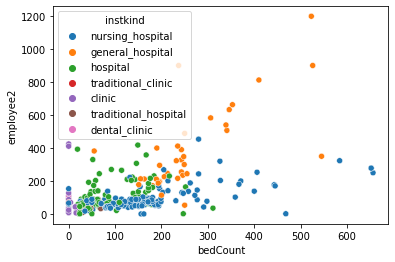

In [ ]:
sns.scatterplot(x='bedCount',y='employee2',hue='instkind',data=train_df)

In [ ]:
train_df[train_df['instkind']=='traditional_hospital']

,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
48,1.0,1.0,1,1994.0,28.0,traditional_hospital,8.872427e+09,9.641249e+08,7.638920e+09,4.488958e+09,...,5.958278e+09,5.956278e+09,4.992758e+09,2.000000e+06,0.000000e+00,3.625952e+09,0.000000e+00,NaN,NaN,NaN
71,0.0,0.0,26,1999.0,NaN,traditional_hospital,4.131858e+09,1.436118e+08,3.529097e+09,2.198043e+09,...,2.658296e+09,2.632717e+09,2.442951e+09,2.557878e+07,0.000000e+00,2.487828e+09,0.000000e+00,85.0,74.0,same
118,1.0,1.0,59,1999.0,64.0,traditional_hospital,9.229936e+09,1.109104e+09,7.406351e+09,4.253617e+09,...,6.411202e+09,1.696640e+09,2.619030e+08,4.714562e+09,4.714562e+09,1.402906e+09,0.000000e+00,87.0,88.0,same
121,1.0,2.0,47,1978.0,69.0,traditional_hospital,1.889868e+09,1.128316e+08,1.694670e+09,1.077318e+09,...,1.627828e+09,1.627828e+09,1.078103e+09,0.000000e+00,0.000000e+00,8.421260e+08,0.000000e+00,35.0,32.0,same
170,1.0,1.0,114,2007.0,31.0,traditional_hospital,1.358924e+09,0.000000e+00,1.070587e+09,5.503795e+08,...,1.930632e+09,1.785595e+08,6.542067e+07,1.752072e+09,0.000000e+00,2.686272e+09,0.000000e+00,9.0,10.0,same
205,1.0,0.0,31,2006.0,48.0,traditional_hospital,1.794076e+09,7.893540e+07,1.577849e+09,1.005042e+09,...,5.041793e+09,1.917934e+08,0.000000e+00,4.850000e+09,4.850000e+09,4.249139e+09,0.000000e+00,42.0,35.0,same
265,1.0,0.0,102,2014.0,40.0,traditional_hospital,3.279694e+09,1.779145e+08,2.569055e+09,1.508745e+09,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,42.0,33.0,same
300,1.0,1.0,79,2001.0,NaN,traditional_hospital,1.340971e+09,8.108450e+08,5.043409e+08,1.318978e+08,...,5.349000e+09,3.123072e+09,0.000000e+00,2.225928e+09,2.190000e+09,5.536178e+09,6.269440e+09,15.0,15.0,same


In [ ]:
train_df['instkind'].value_counts()

nursing_hospital        144
hospital                 88
general_hospital         37
clinic                   18
traditional_hospital      8
traditional_clinic        4
dental_clinic             1
Name: instkind, dtype: int64

In [ ]:
train_df[['instkind', 'OC']].groupby(['instkind'], as_index=False).mean().sort_values(by='OC', ascending=False)

,instkind,OC
1,dental_clinic,1.000000
2,general_hospital,0.972973
4,nursing_hospital,0.965278
0,clinic,0.944444
3,hospital,0.943182
6,traditional_hospital,0.875000
5,traditional_clinic,0.750000


In [ ]:
train_df.loc[train_df['instkind'] == 'dental_clinic', 'instkind'] = 1
train_df.loc[train_df['instkind'] == 'general_hospital', 'instkind'] = 1
train_df.loc[train_df['instkind'] == 'nursing_hospital', 'instkind'] = 1
train_df.loc[train_df['instkind'] == 'clinic', 'instkind'] = 1
train_df.loc[train_df['instkind'] == 'hospital', 'instkind'] = 1
train_df.loc[train_df['instkind'] == 'traditional_hospital', 'instkind'] = 0
train_df.loc[train_df['instkind'] == 'traditional_clinic', 'instkind'] = 0

predict_df.loc[predict_df['instkind'] == 'dental_clinic', 'instkind'] = 1
predict_df.loc[predict_df['instkind'] == 'general_hospital', 'instkind'] = 1
predict_df.loc[predict_df['instkind'] == 'nursing_hospital', 'instkind'] = 1
predict_df.loc[predict_df['instkind'] == 'clinic', 'instkind'] = 1
predict_df.loc[predict_df['instkind'] == 'hospital', 'instkind'] = 1
predict_df.loc[predict_df['instkind'] == 'traditional_hospital', 'instkind'] = 0
predict_df.loc[predict_df['instkind'] == 'traditional_clinic', 'instkind'] = 0

In [ ]:
train_df['instkind'] = train_df['instkind'].astype(float)
predict_df['instkind'] = predict_df['instkind'].astype(float)

### (4) employee 1, 2

In [ ]:
predict_df.employee1 = predict_df.employee1.astype('str').str.replace(",", "").astype('float')
predict_df.employee2 = predict_df.employee2.astype('str').str.replace(",", "").astype('float')

In [ ]:
train_df.employee1 = train_df.employee1.astype('float')
train_df.employee2 = train_df.employee2.astype('float')

### (5) ownerChange

In [ ]:
train_df[['ownerChange', 'OC']].groupby(['ownerChange'], as_index=False).mean().sort_values(by='OC', ascending=False)

,ownerChange,OC
1,same,0.979757
0,change,0.857143


In [ ]:
train_df.loc[train_df['ownerChange'] == 'same', 'ownerChange'] = 1
train_df.loc[train_df['ownerChange'] == 'change', 'ownerChange'] = 0

In [ ]:
predict_df.loc[predict_df['ownerChange'] == 'same', 'ownerChange'] = 1
predict_df.loc[predict_df['ownerChange'] == 'change', 'ownerChange'] = 0

In [ ]:
train_df.ownerChange = train_df.ownerChange.astype('float')
predict_df.ownerChange = predict_df.ownerChange.astype('float')

## 4. 모델 만들기

In [ ]:
X = train_df.drop('OC', axis=1) # label을 제외한 나머지 컬럼들을 X에 저장
Y = train_df['OC'] # label인 Body mess를 Y에 저장
P = predict_df

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

### (1) XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, x_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.999074074074074 0.9407407407407407


In [ ]:
xgb.fit(x_train, y_train)
print(xgb.score(x_train, y_train), xgb.score(x_test, y_test))

1.0 0.967741935483871


### (2) LightGBM

In [ ]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, x_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9407407407407407


In [ ]:
lgb.fit(x_train, y_train)
print(lgb.score(x_train, y_train), lgb.score(x_test, y_test))

1.0 0.967741935483871


### (3) HistGradientBoostingClassifier

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, x_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9444444444444444


In [ ]:
hgb.fit(x_train, y_train)
print(hgb.score(x_train, y_train), hgb.score(x_test, y_test))

1.0 0.967741935483871


### (4) 앙상블

In [ ]:
model_XGB = XGBClassifier(tree_method='hist', random_state=42).fit(X, Y)
model_GBM = LGBMClassifier(random_state=42).fit(X, Y)
model_HGB = HistGradientBoostingClassifier(random_state=42).fit(X, Y)

In [ ]:
pred_XGB = model_XGB.predict(P)
pred_GBM = model_GBM.predict(P)
pred_HGB = model_HGB.predict(P)

In [ ]:
pred = (pred_XGB + pred_GBM + pred_HGB)/3

In [ ]:
print(pred)

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.66666667 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.66666667 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.33333333 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.         1.         

In [49]:
for i in range(len(pred)):
  if pred[i] >= 0.7:
    pred[i] = 1
  else:
    pred[i] = 0

In [50]:
# submission 파일에 넣어서 제출

submission = pd.read_csv('submission_sample.csv')
submission['OC'] = pred

submission.to_csv('submission.csv', index=False)
submission

,inst_id,OC
0,2,1.0
1,5,1.0
2,6,1.0
3,8,1.0
4,10,1.0
...,...,...
122,424,0.0
123,425,1.0
124,429,0.0
125,430,0.0
